#**Importing Libraries :-**

In [ ]:
pip install imbalanced-learn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy  as np
%matplotlib inline
sns.set(rc={'figure.figsize':(12, 12)}, font_scale=1.2)
from datetime import datetime

#**5. Spliting Data to Train and Test Data :-**
>The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

>it is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem.

> Finally we introduced the idea of dividing your data set into two subsets :
1. training set—a subset to train a model.
2. test set—a subset to test the trained model.


>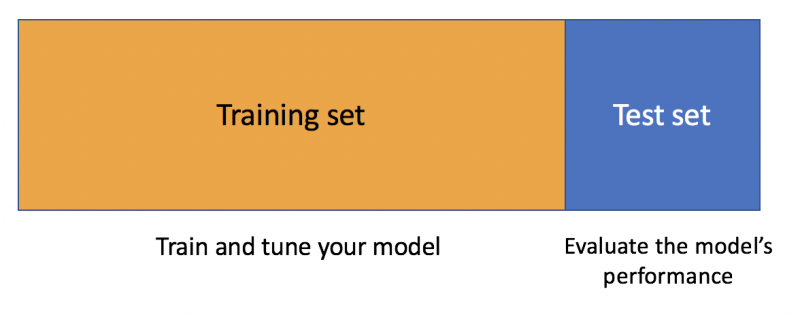

In [ ]:
df_tips = sns.load_dataset('tips')

In [ ]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [ ]:
df_tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
df_tips.sample(10)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
94,22.75,3.25,Female,No,Fri,Dinner,2
203,16.40,2.50,Female,Yes,Thur,Lunch,2
17,16.29,3.71,Male,No,Sun,Dinner,3
36,16.31,2.00,Male,No,Sat,Dinner,3
54,25.56,4.34,Male,No,Sun,Dinner,4
176,17.89,2.00,Male,Yes,Sun,Dinner,2
179,34.63,3.55,Male,Yes,Sun,Dinner,2
60,20.29,3.21,Male,Yes,Sat,Dinner,2
186,20.90,3.50,Female,Yes,Sun,Dinner,3


In [ ]:
df_melb = pd.read_csv('/content/melb_data.csv')

In [ ]:
df_melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
df_melb.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [ ]:
df_melb.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
10104,Armadale,5/6 St James Rd,2,u,590000.0,S,Jellis,27/05/2017,6.3,3143.0,2.0,1.0,1.0,903.0,NaN,NaN,Stonnington,-37.85963,145.02077,Southern Metropolitan,4836.0
2364,Essendon,4 Agatha St,3,h,1240000.0,S,Nelson,8/10/2016,8.0,3040.0,3.0,2.0,2.0,307.0,NaN,NaN,Moonee Valley,-37.75430,144.92490,Western Metropolitan,9264.0
5095,Reservoir,1/35 George St,2,u,491000.0,S,Love,10/12/2016,11.2,3073.0,2.0,1.0,1.0,168.0,93.00,1970.0,Darebin,-37.71670,145.00010,Northern Metropolitan,21650.0
8530,Yarraville,260 Francis St,3,h,892000.0,S,Village,13/05/2017,7.0,3013.0,3.0,1.0,2.0,449.0,106.76,1940.0,Maribyrnong,-37.81950,144.87660,Western Metropolitan,6543.0
588,Balwyn North,32 Jaserfold St,2,h,1080000.0,S,Jellis,3/09/2016,9.2,3104.0,2.0,1.0,1.0,253.0,NaN,NaN,Boroondara,-37.79120,145.08500,Southern Metropolitan,7809.0
2673,Footscray,105/64 Cross St,2,u,490000.0,S,Sweeney,8/10/2016,6.4,3011.0,2.0,1.0,1.0,0.0,NaN,NaN,Maribyrnong,-37.80060,144.88100,Western Metropolitan,7570.0
6094,Sunshine West,34 Joan St,3,h,682000.0,S,Barry,26/07/2016,13.5,3020.0,3.0,1.0,1.0,694.0,155.00,1960.0,Brimbank,-37.78940,144.80270,Western Metropolitan,6763.0
12997,Heathmont,21 Balfour Av,5,h,1825000.0,SP,Barry,19/08/2017,21.3,3135.0,5.0,3.0,2.0,779.0,NaN,1975.0,NaN,-37.83015,145.24171,Eastern Metropolitan,3794.0
3574,Kensington,8/37 Kensington Rd,2,u,506000.0,SP,Sweeney,27/11/2016,4.2,3031.0,2.0,1.0,1.0,0.0,NaN,NaN,Melbourne,-37.79520,144.92620,Northern Metropolitan,5263.0
1475,Bulleen,9 Albany Pl,5,h,1490000.0,S,Fletchers,7/11/2016,11.8,3105.0,5.0,3.0,2.0,796.0,304.00,1975.0,Manningham,-37.76970,145.08710,Eastern Metropolitan,4480.0


## **Step 1 : Extract inputs and outputs from dataset**

In [ ]:
inputs_df_tips = df_tips.drop('tip',axis=1)

In [ ]:
inputs_df_tips

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,Male,No,Sat,Dinner,3
240,27.18,Female,Yes,Sat,Dinner,2
241,22.67,Male,Yes,Sat,Dinner,2
242,17.82,Male,No,Sat,Dinner,2


In [ ]:
outputs_df_tips = df_tips['tip']

In [ ]:
outputs_df_tips

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [ ]:
inputs_df_melb = df_melb.drop('Price',axis=1)

In [ ]:
inputs_df_melb

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [ ]:
outputs_df_melb = df_melb['Price']

In [ ]:
outputs_df_melb

0        1480000.0
1        1035000.0
2        1465000.0
3         850000.0
4        1600000.0
           ...    
13575    1245000.0
13576    1031000.0
13577    1170000.0
13578    2500000.0
13579    1285000.0
Name: Price, Length: 13580, dtype: float64

## **Step 2 : Spliting Data to Train and Test**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
inputs_df_tips_train, inputs_df_tips_test,outputs_df_tips_train,outputs_df_tips_test = train_test_split(inputs_df_tips, outputs_df_tips, test_size=0.25, random_state=1)

In [ ]:
inputs_df_tips_train

,total_bill,sex,smoker,day,time,size
236,12.60,Male,Yes,Sat,Dinner,2
169,10.63,Female,Yes,Sat,Dinner,2
78,22.76,Male,No,Thur,Lunch,2
47,32.40,Male,No,Sun,Dinner,4
194,16.58,Male,Yes,Thur,Lunch,2
...,...,...,...,...,...,...
137,14.15,Female,No,Thur,Lunch,2
72,26.86,Female,Yes,Sat,Dinner,2
140,17.47,Female,No,Thur,Lunch,2
235,10.07,Male,No,Sat,Dinner,2


In [ ]:
inputs_df_tips_train.shape

(183, 6)

In [ ]:
outputs_df_tips_train

236    1.00
169    2.00
78     3.00
47     6.00
194    4.00
       ... 
137    2.00
72     3.14
140    3.50
235    1.25
37     3.07
Name: tip, Length: 183, dtype: float64

In [ ]:
outputs_df_tips_test.shape

(61,)

In [ ]:
inputs_df_tips_test

,total_bill,sex,smoker,day,time,size
67,3.07,Female,Yes,Sat,Dinner,1
243,18.78,Female,No,Thur,Dinner,2
206,26.59,Male,Yes,Sat,Dinner,3
122,14.26,Male,No,Thur,Lunch,2
89,21.16,Male,No,Thur,Lunch,2
...,...,...,...,...,...,...
185,20.69,Male,No,Sun,Dinner,5
28,21.70,Male,No,Sat,Dinner,2
16,10.33,Female,No,Sun,Dinner,3
148,9.78,Male,No,Thur,Lunch,2


In [ ]:
inputs_df_tips_test.shape

(61, 6)

In [ ]:
outputs_df_tips_test

67     1.00
243    3.00
206    3.41
122    2.50
89     3.00
       ... 
185    5.00
28     4.30
16     1.67
148    1.73
237    1.17
Name: tip, Length: 61, dtype: float64

In [ ]:
outputs_df_tips_test.shape

(61,)

In [ ]:
inputs_df_melb_train, inputs_df_melb_test,outputs_df_melb_train,outputs_df_melb_test = train_test_split(inputs_df_melb, outputs_df_melb, test_size=0.2, random_state=32)

In [ ]:
inputs_df_melb_train

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
10231,Dingley Village,1/270 Spring Rd,2,u,S,Ray,27/05/2017,22.2,3172.0,2.0,1.0,1.0,2256.0,NaN,1980.0,Kingston,-37.98110,145.13807,South-Eastern Metropolitan,3940.0
6861,East Melbourne,1/187 George St,2,u,PI,Harcourts,22/08/2016,1.5,3002.0,2.0,2.0,1.0,0.0,65.0,1970.0,Melbourne,-37.81530,144.98420,Northern Metropolitan,3040.0
12191,Wantirna,16 Mariemont Av,4,h,S,Ray,29/07/2017,14.7,3152.0,4.0,2.0,3.0,741.0,NaN,NaN,Knox,-37.85636,145.23684,Eastern Metropolitan,5424.0
10215,Craigieburn,77 Huntington Dr,3,h,S,Ray,27/05/2017,20.6,3064.0,3.0,2.0,1.0,280.0,127.0,2010.0,Hume,-37.57056,144.91751,Northern Metropolitan,15510.0
10009,Port Melbourne,6/5 Liardet St,2,u,S,hockingstuart,24/06/2017,3.5,3207.0,2.0,1.0,1.0,0.0,NaN,2000.0,Port Phillip,-37.84237,144.94486,Southern Metropolitan,8648.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4030,Mont Albert,48 Kenmare St,3,h,SP,Fletchers,7/11/2016,11.8,3127.0,3.0,3.0,2.0,1149.0,225.0,1920.0,Whitehorse,-37.81200,145.10950,Eastern Metropolitan,2079.0
11132,Mulgrave,95 Wanda St,4,h,SP,Noel,12/08/2017,18.8,3170.0,4.0,2.0,7.0,771.0,NaN,NaN,Monash,-37.92862,145.16664,South-Eastern Metropolitan,7113.0
9526,Epping,10 Efficient St,3,h,S,Ray,17/06/2017,19.6,3076.0,3.0,2.0,2.0,420.0,190.0,2012.0,Whittlesea,-37.62145,145.01051,Northern Metropolitan,10926.0
9771,Alphington,1 Shiers St,4,h,S,Thomas,24/06/2017,5.7,3078.0,4.0,1.0,2.0,605.0,NaN,NaN,Darebin,-37.77474,145.03012,Northern Metropolitan,2211.0


In [ ]:
inputs_df_melb_train.shape

(10864, 20)

In [ ]:
outputs_df_melb_train

10231     595000.0
6861      700000.0
12191    1200000.0
10215     430000.0
10009     816000.0
           ...    
4030     2588000.0
11132    1001000.0
9526      568000.0
9771     1800000.0
10967     640000.0
Name: Price, Length: 10864, dtype: float64

In [ ]:
outputs_df_melb_train.shape

(10864,)

In [ ]:
inputs_df_melb_test

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13388,Canterbury,10 Beaumont St,3,h,S,Jellis,26/08/2017,8.4,3126.0,3.0,2.0,2.0,449.0,NaN,1915.0,NaN,-37.82359,145.06930,Southern Metropolitan,3265.0
6122,Surrey Hills,7 Empress Rd,3,h,S,Marshall,6/08/2016,11.2,3127.0,3.0,2.0,1.0,404.0,NaN,NaN,Boroondara,-37.82030,145.08800,Southern Metropolitan,5457.0
12934,Cheltenham,6 Shadwell St,3,h,S,Buxton,19/08/2017,17.9,3192.0,3.0,1.0,1.0,584.0,133.00,1960.0,NaN,-37.96402,145.06658,Southern Metropolitan,9758.0
2504,Fairfield,1/72 Rathmines St,2,u,S,hockingstuart,18/03/2017,5.8,3078.0,2.0,1.0,1.0,1658.0,68.00,1970.0,Darebin,-37.77810,145.01570,Northern Metropolitan,2970.0
11688,Glen Waverley,2 Wattletree Ct,5,h,S,Barry,22/07/2017,16.7,3150.0,5.0,2.0,2.0,803.0,NaN,NaN,Monash,-37.87942,145.17668,Eastern Metropolitan,15321.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8610,Essendon North,10 Cowper St,4,h,S,Barry,8/04/2017,9.4,3041.0,4.0,2.0,2.0,521.0,157.00,1945.0,Moonee Valley,-37.73720,144.90220,Western Metropolitan,1308.0
714,Bentleigh,39 Luckins Rd,4,h,PI,Buxton,7/11/2016,13.0,3204.0,4.0,2.0,2.0,697.0,194.00,1940.0,Glen Eira,-37.93180,145.04740,Southern Metropolitan,6795.0
5646,South Yarra,16/384 Toorak Rd,2,u,S,hockingstuart,14/05/2016,3.3,3141.0,2.0,1.0,1.0,0.0,NaN,NaN,Stonnington,-37.84060,145.00350,Southern Metropolitan,14887.0
13084,Williamstown,54 Victoria St,5,h,PI,Williams,19/08/2017,6.8,3016.0,5.0,2.0,2.0,840.0,244.00,1910.0,NaN,-37.86330,144.88871,Western Metropolitan,6380.0


In [ ]:
inputs_df_melb_test.shape

(2716, 20)

In [ ]:
outputs_df_melb_test

13388    1935000.0
6122     1910000.0
12934    1230000.0
2504      510000.0
11688    1832000.0
           ...    
8610     1291000.0
714      1300000.0
5646      550000.0
13084    2550000.0
11447    1260000.0
Name: Price, Length: 2716, dtype: float64

In [ ]:
outputs_df_melb_test.shape

(2716,)

#**6. Dealling with Imbalanced classes :-**

>Imbalanced classes is the problem of classification when there is an unequal distribution of classes in the training dataset.

>The imbalance in the class distribution may vary, but a severe imbalance is more challenging to model and may require specialized techniques.

>Many real-world classification problems have an imbalanced class distribution, such as fraud detection, spam detection, and churn prediction.


>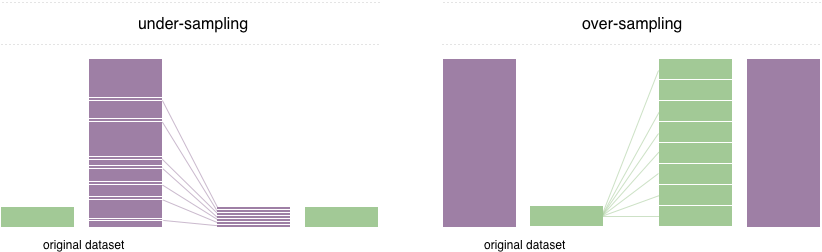

##**Step 1 : Detect imbalanced classes**

In [ ]:
df_review = pd.read_csv('/content/Restaurant_Reviews.csv')

In [ ]:
df_review.describe()

,Liked,Unnamed: 2,Unnamed: 3
count,991.000000,0.0,0.0
mean,0.807265,NaN,NaN
std,0.394646,NaN,NaN
min,0.000000,NaN,NaN
25%,1.000000,NaN,NaN
50%,1.000000,NaN,NaN
75%,1.000000,NaN,NaN
max,1.000000,NaN,NaN


In [ ]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Review      992 non-null    object 
 1   Liked       991 non-null    float64
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  1 non-null      object 
dtypes: float64(3), object(2)
memory usage: 38.9+ KB


In [ ]:
df_review.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df_review.dropna(inplace=True)

In [ ]:
df_review['Liked'] = df_review['Liked'].apply(str)

In [ ]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 0 to 990
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  991 non-null    object
 1   Liked   991 non-null    object
dtypes: object(2)
memory usage: 23.2+ KB


In [ ]:
df_review.describe()

,Review,Liked
count,991,991
unique,973,2
top,Overall,1.0
freq,5,800


In [ ]:
df_review.sample(5)

,Review,Liked
679,The decor is nice,1.0
929,Don't bother coming here.,1.0
18,This place is not worth your time,1.0
701,I mean really,1.0
975,It sure does beat the nachos at the movies but...,1.0


In [ ]:
df_review['Liked'].value_counts()

1.0    800
0.0    191
Name: Liked, dtype: int64

In [ ]:
(df_review['Liked'].value_counts()*100) / len(df_review)


1.0    80.726539
0.0    19.273461
Name: Liked, dtype: float64

**As we see this not balance in two classes so we want to fix this problem**

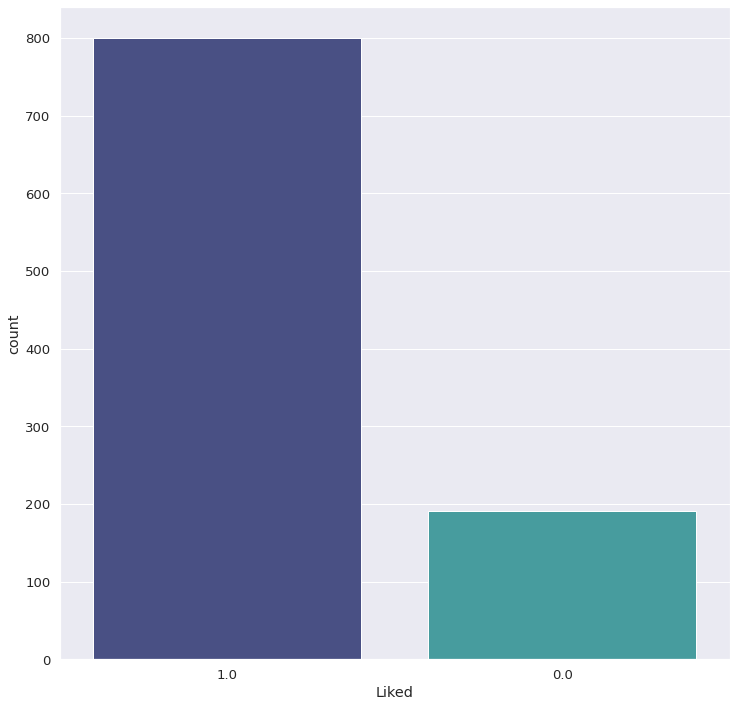

In [ ]:
sns.countplot(x= df_review['Liked'],palette='mako')

In [ ]:
df_credit = pd.read_csv('/content/creditcard.csv')

In [ ]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    14999 non-null  int64  
 1   V1      14999 non-null  float64
 2   V2      14999 non-null  float64
 3   V3      14999 non-null  float64
 4   V4      14999 non-null  float64
 5   V5      14999 non-null  float64
 6   V6      14999 non-null  float64
 7   V7      14999 non-null  float64
 8   V8      14999 non-null  float64
 9   V9      14999 non-null  float64
 10  V10     14999 non-null  float64
 11  V11     14999 non-null  float64
 12  V12     14999 non-null  float64
 13  V13     14999 non-null  float64
 14  V14     14999 non-null  float64
 15  V15     14999 non-null  float64
 16  V16     14999 non-null  float64
 17  V17     14999 non-null  float64
 18  V18     14999 non-null  float64
 19  V19     14999 non-null  float64
 20  V20     14999 non-null  float64
 21  V21     14999 non-null  float64
 22

In [ ]:
df_credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,11200.553504,-0.235883,0.280606,0.832523,0.298982,-0.119083,0.125885,-0.149518,-0.012964,0.931173,-0.305305,0.834481,-1.479779,0.953517,0.788753,-0.163729,-0.035076,0.392733,-0.010034,-0.086301,0.026110,-0.066631,-0.160318,-0.034764,0.010859,0.117077,0.037973,0.013846,0.004026,64.496628,0.004067
std,8443.892410,1.733149,1.400328,1.577234,1.491099,1.295717,1.320734,1.243867,1.255054,1.231662,1.250009,1.196877,1.554213,1.172164,1.344242,0.979235,0.966119,1.233462,0.850065,0.825883,0.591351,0.862181,0.621514,0.492949,0.587439,0.429819,0.552339,0.404068,0.256349,177.403447,0.063645
min,0.000000,-27.670569,-34.607649,-24.667741,-5.172595,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,-14.166795,-2.767470,-17.769143,-3.389510,-19.214325,-4.152532,-12.227189,-18.587366,-8.061208,-4.932733,-13.276034,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-8.567638,-3.575312,0.000000,0.000000
25%,3244.000000,-0.968794,-0.285610,0.394579,-0.621227,-0.711832,-0.627607,-0.607732,-0.181353,0.180414,-0.759039,0.032647,-2.439712,0.123366,0.195521,-0.741198,-0.516955,-0.085321,-0.448190,-0.573694,-0.161437,-0.271421,-0.554598,-0.172742,-0.339357,-0.137943,-0.365082,-0.075000,-0.014014,5.490000,0.000000
50%,10232.000000,-0.317951,0.251923,0.951773,0.225931,-0.188225,-0.151282,-0.098663,0.016985,0.919064,-0.367707,0.775876,-1.798520,1.031941,1.062440,-0.027821,0.038159,0.390850,0.041442,-0.090064,-0.035683,-0.130291,-0.124657,-0.045052,0.060385,0.156682,-0.029068,0.000061,0.017042,15.950000,0.000000
75%,19526.000000,1.162181,0.883147,1.589710,1.182953,0.350648,0.507444,0.425482,0.264890,1.609215,0.139788,1.623480,-0.209002,1.829237,1.537633,0.510721,0.534998,0.874097,0.486565,0.431053,0.141949,0.022054,0.228305,0.071116,0.392469,0.393032,0.368751,0.099444,0.074362,53.220000,0.000000
max,26323.000000,1.960497,11.067069,4.101716,11.927512,34.099309,21.393069,34.303177,12.101062,10.392889,12.259949,12.018913,3.774837,4.465413,7.692209,3.635042,4.816252,9.253526,4.295648,4.555359,8.012574,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [ ]:
df_credit.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
11703,19991,-0.436269,1.888773,-2.887259,1.945192,0.434991,-1.662936,0.244851,0.520208,0.955806,-1.713730,0.827571,-3.404139,0.907064,-1.392109,0.447988,1.265537,3.740256,2.112884,-0.466070,-0.072510,-0.297703,-0.590753,0.083831,-0.530596,-0.365911,-0.397159,0.191195,-0.196675,89.99,0
14460,25623,0.284118,0.700010,0.789470,0.086501,0.173704,0.165139,-0.127458,-0.680678,-0.518529,-0.418296,1.609972,1.086185,0.529324,-0.128464,0.544917,0.494142,-0.080601,-0.185847,-0.262827,-0.177304,0.510398,-1.028030,-0.068184,-0.344116,0.783196,0.204023,0.043926,0.096563,1.77,0
8953,12327,0.143981,-2.405413,-0.278564,-0.381569,-1.056587,0.680356,-0.144558,0.065581,3.452139,-1.706085,-0.875794,-3.158080,0.053121,1.711681,1.183011,-0.204674,0.474198,0.988235,0.258331,0.947694,0.264167,-0.126997,-0.770261,-1.373408,0.430464,-0.510453,-0.043032,0.109299,601.80,0
9555,14305,-0.408427,1.259202,1.560650,0.286148,0.205258,-0.632104,0.610503,-0.085158,0.733426,-0.953155,1.395168,-1.937085,2.539415,0.882737,0.290517,-0.074246,1.088521,-0.525107,-0.781699,0.087584,-0.354127,-0.631031,0.060889,0.311201,-0.270192,0.039849,0.240752,0.093796,4.88,0
7550,10369,1.111065,0.545980,0.750707,2.450146,0.191360,0.481849,-0.197253,0.166455,0.417873,0.443854,1.965029,-2.278183,0.906750,2.074098,-0.520415,0.780974,0.033793,0.046854,-1.067349,-0.237992,-0.346103,-0.880483,0.136438,-0.435264,0.138783,-0.270529,-0.027408,0.005097,10.25,0


In [ ]:
df_credit['Class'].value_counts()

0    14938
1       61
Name: Class, dtype: int64

In [ ]:
(df_credit['Class'].value_counts() * 100)/len(df_credit)

0    99.593306
1     0.406694
Name: Class, dtype: float64

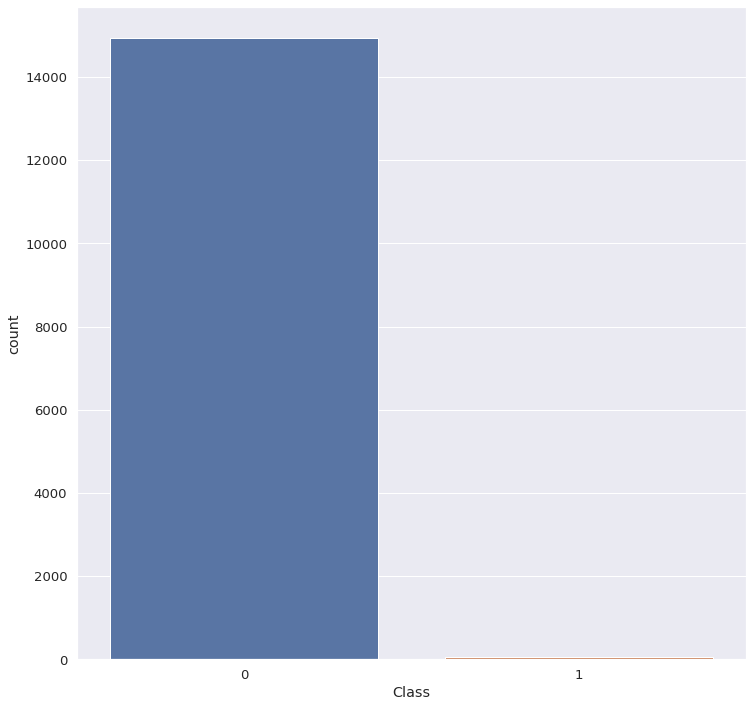

In [ ]:
sns.countplot(x= df_credit['Class'])

## **Step 2 : Resampling for this imbalanced classes**

###**1. Under Sampling using RandomUnderSampler**
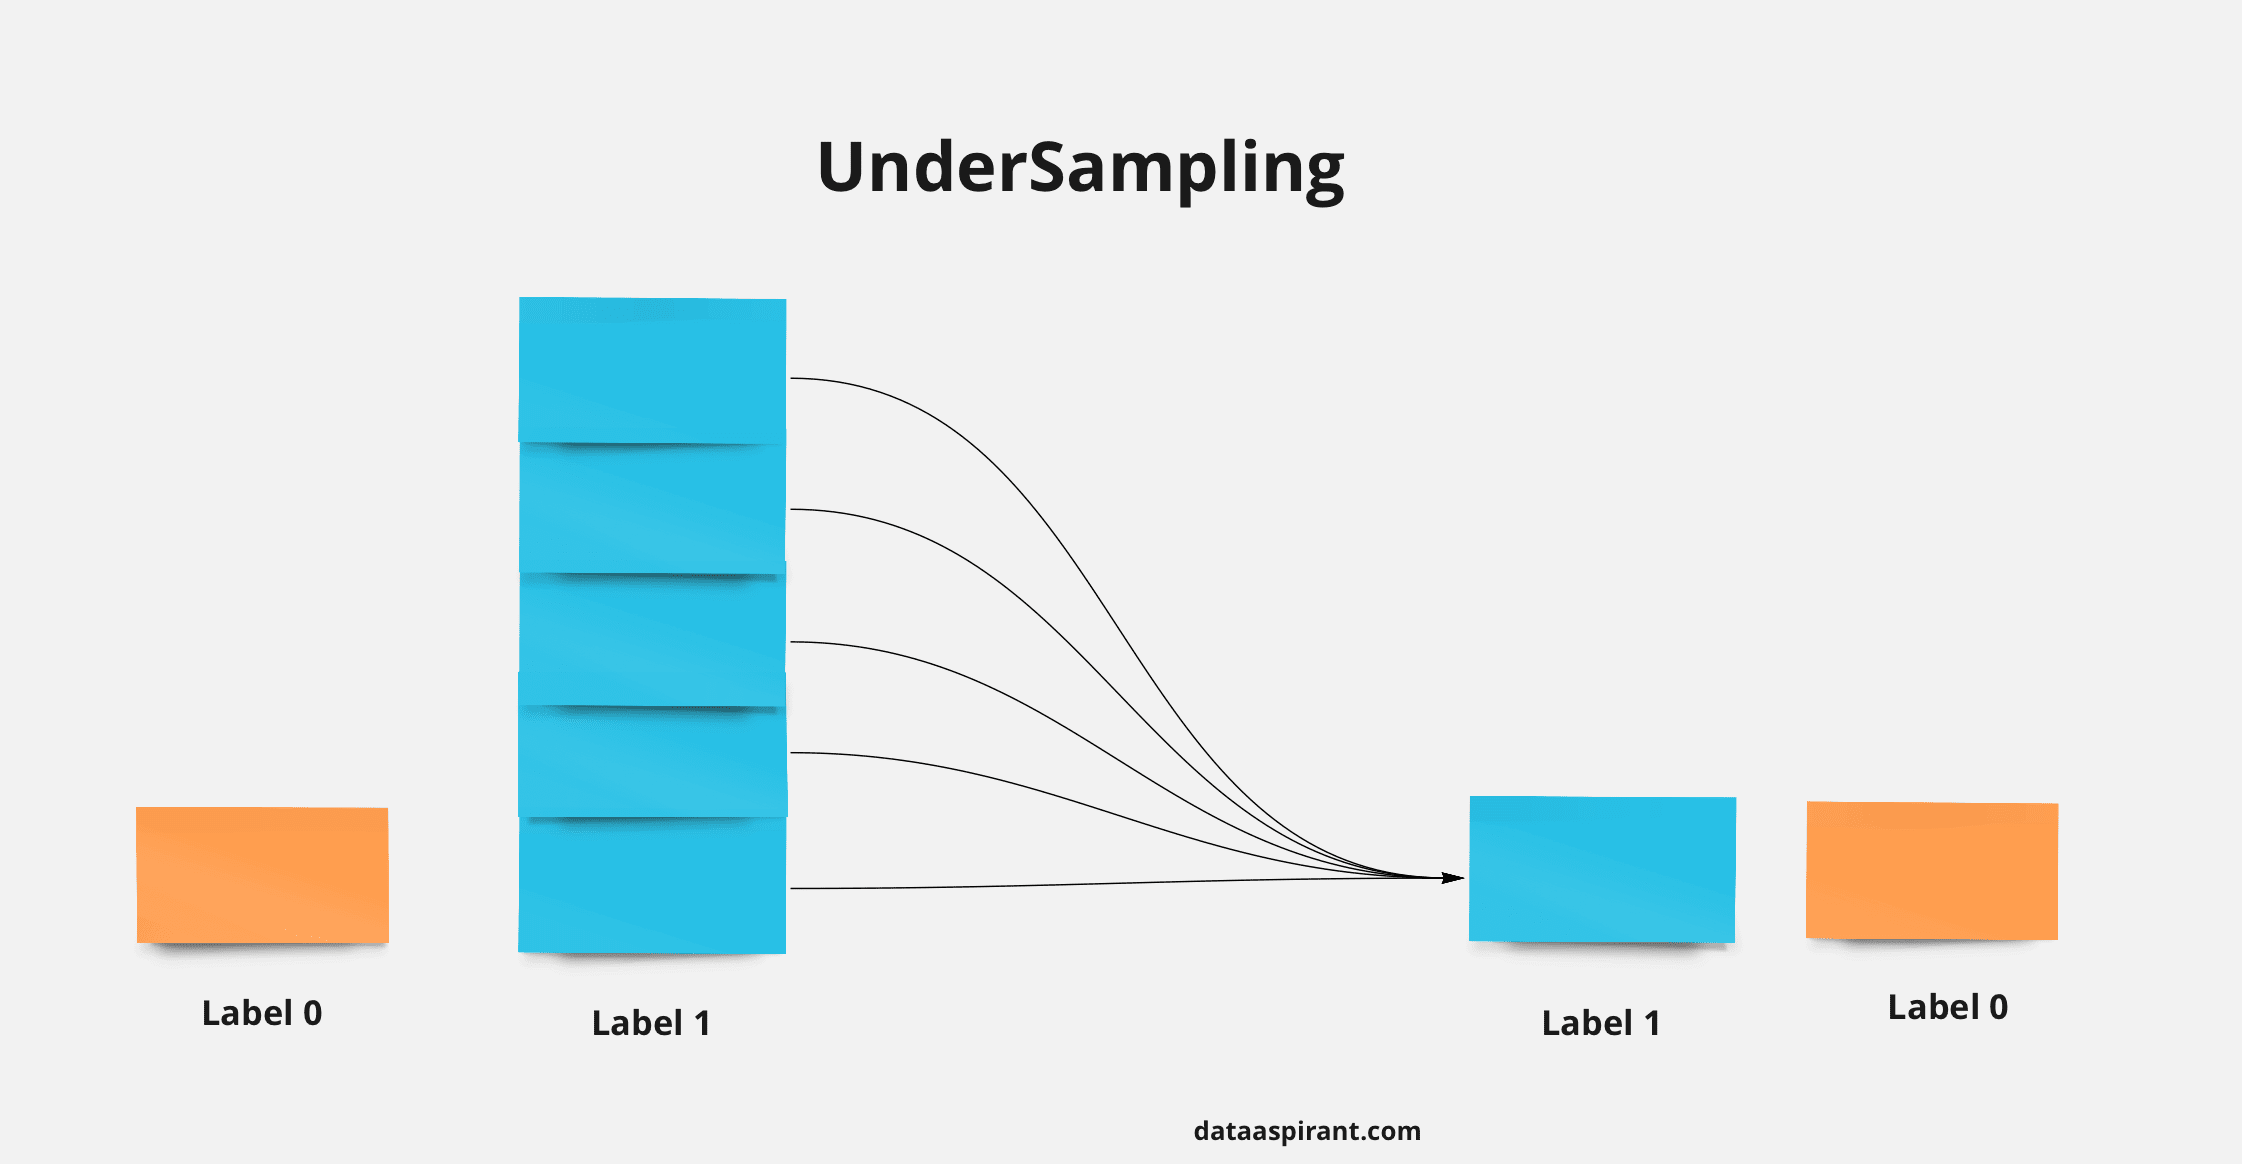

In [ ]:
#Spliting the data fristly to inputs and outputs
x = df_credit.drop('Class', axis=1)
y = df_credit['Class']

In [ ]:
# setting up testing and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)

In [ ]:
x_train.shape

(11249, 30)

In [ ]:
x_test.shape

(3750, 30)

In [ ]:
y_train.shape

(11249,)

In [ ]:
y_train.value_counts()

0    11207
1       42
Name: Class, dtype: int64

In [ ]:
y_test.shape

(3750,)

In [ ]:
y_test.value_counts()

0    3731
1      19
Name: Class, dtype: int64

In [ ]:
#Starting under sampling 
from imblearn.under_sampling import RandomUnderSampler
import collections 
sm = RandomUnderSampler(random_state=27)
x_train, y_train = sm.fit_sample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
y_train.shape

(84,)

In [ ]:
collections.Counter(y_train)

Counter({0: 42, 1: 42})

In [ ]:
x_train.shape

(84, 30)

In [ ]:
#Spliting the data fristly to inputs and outputs
x = df_review.drop('Liked', axis=1)
y = df_review['Liked']

In [ ]:
# setting up testing and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=27)

In [ ]:
x_train.shape

(792, 1)

In [ ]:

x_test.shape

(199, 1)

In [ ]:
y_train.shape


(792,)

In [ ]:
y_train.value_counts()


1.0    644
0.0    148
Name: Liked, dtype: int64

In [ ]:
y_test.shape

(199,)

In [ ]:
y_test.value_counts()

1.0    156
0.0     43
Name: Liked, dtype: int64

In [ ]:
#Starting under sampling 
from imblearn.under_sampling import RandomUnderSampler
import collections 
sm = RandomUnderSampler(random_state=27)
x_train, y_train = sm.fit_sample(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
y_train.shape

(296,)

In [ ]:
collections.Counter(y_train)

Counter({'0.0': 148, '1.0': 148})

In [ ]:
x_train.shape

(296, 1)

###**2. Over Sampling using SMOTE**

>SMOTE or Synthetic Minority Oversampling Technique is a popular algorithm to creates sythetic observations of the minority class.
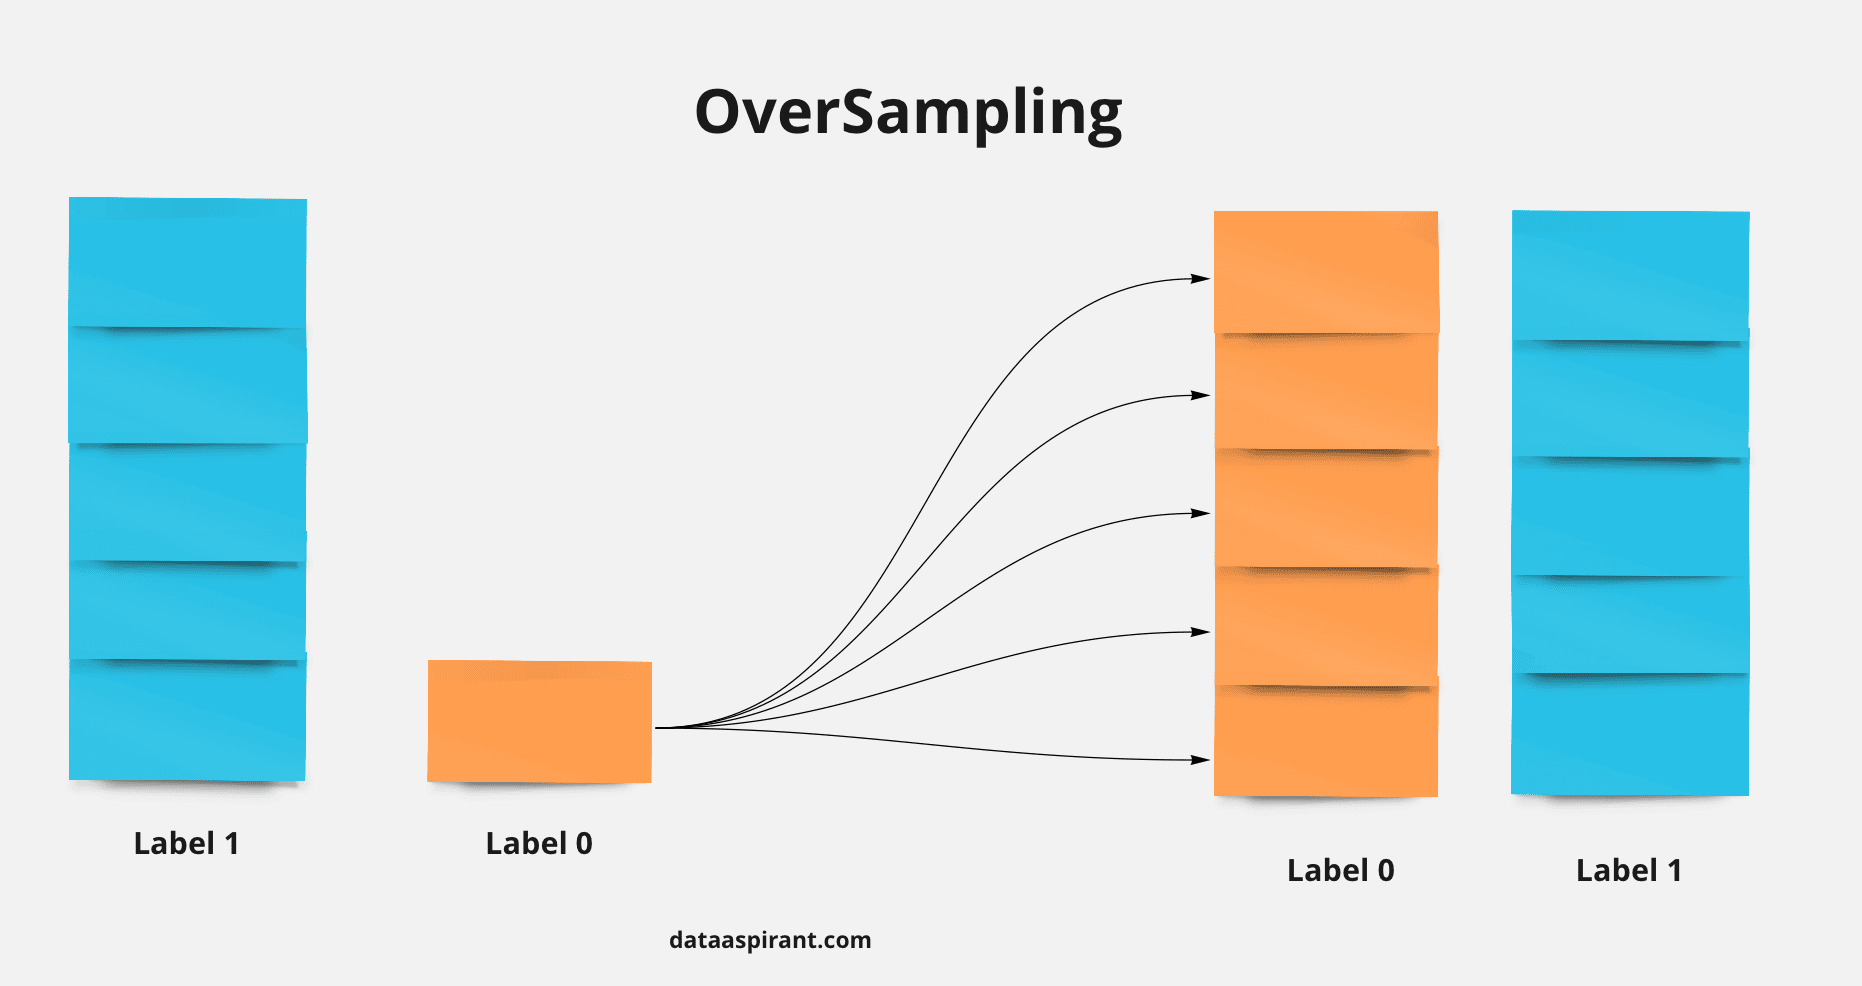


**Over Sampling using SMOTE**
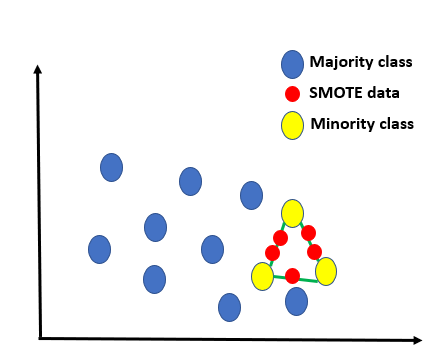

In [ ]:
#Spliting the data fristly to inputs and outputs
x = df_credit.drop('Class', axis=1)
y = df_credit['Class']

In [ ]:
# setting up testing and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)

In [ ]:
x_train.shape

In [ ]:
x_test.shape

(3750, 30)

In [ ]:
y_train.shape

(11249,)

In [ ]:
y_train.value_counts()

0    11207
1       42
Name: Class, dtype: int64

In [ ]:
y_test.shape

(3750,)

In [ ]:
y_test.value_counts()

0    3731
1      19
Name: Class, dtype: int64

In [ ]:
#Starting under sampling 
from imblearn.over_sampling import SMOTE
import collections 
sm = SMOTE(random_state=27)
x_train, y_train = sm.fit_sample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
y_train.shape

(22414,)

In [ ]:
collections.Counter(y_train)

Counter({0: 11207, 1: 11207})

In [ ]:
x_train.shape

(22414, 30)

# **7. Feature Scalling :-**
>Feature scaling is a method used to normalize the range of independent variables or features of data.

>Feature scaling through standardization and  normalization can be an important preprocessing step for many machine learning algorithms

>Feature Scalling Methods can be :- 
1.  Standardization
2.  Normalization



##**1.  Standardization**

> we determine the distribution mean and standard deviation for each feature. 
Next we subtract the mean from each feature. Then we divide the values of each feature by its standard deviation. So, in standardization, we center the feature columns at mean 0 with standard deviation 1 so that the feature columns takes the form of a normal distribution, which makes it easier to learn the weights.

>**Advantages Standardization:** scales features such that the distribution is centered around 0, with a standard deviation of 1. 

>**Disdvantages Standardization:** not good if the data is not normally distributed (i.e. no Gaussian Distribution).

>Scikit-Learn provides a transformer called StandardScaler for standardization.


> 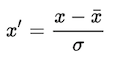

In [ ]:
df_melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
df_melb.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [ ]:
df_melb.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
9725,South Melbourne,17/39 Dorcas St,1,h,407500.0,S,Greg,17/06/2017,1.9,3205.0,1.0,1.0,1.0,0.0,53.0,2000.0,Port Phillip,-37.83087,144.96864,Southern Metropolitan,5943.0
5084,Reservoir,15 Glenvale Rd,3,h,610000.0,VB,Barry,10/09/2016,11.2,3073.0,3.0,1.0,2.0,492.0,NaN,NaN,Darebin,-37.72050,144.98720,Northern Metropolitan,21650.0
8218,Pascoe Vale,6 Wicklow St,3,h,800000.0,S,Brad,13/05/2017,9.9,3044.0,3.0,1.0,2.0,506.0,NaN,NaN,Moreland,-37.71870,144.94330,Northern Metropolitan,7485.0
5544,South Melbourne,22A Cobden St,2,h,930000.0,SP,Cayzer,11/02/2017,2.1,3205.0,2.0,1.0,0.0,115.0,76.0,1900.0,Port Phillip,-37.83450,144.96850,Southern Metropolitan,5943.0
7734,Clifton Hill,42 Grant St,3,h,1500000.0,S,Nelson,8/04/2017,3.4,3068.0,3.0,1.0,1.0,230.0,127.0,1900.0,Yarra,-37.78800,144.99670,Northern Metropolitan,2954.0


In [ ]:
df_scalling = df_melb[['Price','Distance','Postcode','Bedroom2','Car','Landsize','BuildingArea','Propertycount']]

In [ ]:
df_scalling

,Price,Distance,Postcode,Bedroom2,Car,Landsize,BuildingArea,Propertycount
0,1480000.0,2.5,3067.0,2.0,1.0,202.0,NaN,4019.0
1,1035000.0,2.5,3067.0,2.0,0.0,156.0,79.0,4019.0
2,1465000.0,2.5,3067.0,3.0,0.0,134.0,150.0,4019.0
3,850000.0,2.5,3067.0,3.0,1.0,94.0,NaN,4019.0
4,1600000.0,2.5,3067.0,3.0,2.0,120.0,142.0,4019.0
...,...,...,...,...,...,...,...,...
13575,1245000.0,16.7,3150.0,4.0,2.0,652.0,NaN,7392.0
13576,1031000.0,6.8,3016.0,3.0,2.0,333.0,133.0,6380.0
13577,1170000.0,6.8,3016.0,3.0,4.0,436.0,NaN,6380.0
13578,2500000.0,6.8,3016.0,4.0,5.0,866.0,157.0,6380.0


In [ ]:
#Using StandardScalar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [ ]:
df_standarization = scalar.fit_transform(df_scalling)

In [ ]:
df_standarization

array([[ 0.63244803, -1.30148498, -0.42241517, ..., -0.08931566,
                nan, -0.78462481],
       [-0.06363975, -1.30148498, -0.42241517, ..., -0.10084297,
        -0.13488134, -0.78462481],
       [ 0.6089844 , -1.30148498, -0.42241517, ..., -0.10635603,
        -0.00363722, -0.78462481],
       ...,
       [ 0.14753294, -0.56876052, -0.984872  , ..., -0.03067672,
                nan, -0.24538926],
       [ 2.22797508, -0.56876052, -0.984872  , ...,  0.0770786 ,
         0.00930234, -0.24538926],
       [ 0.3274208 , -0.65396104, -1.01795769, ..., -0.04922066,
        -0.07388055, -0.20816122]])

## **2. Normaliztion**
>Normalization refers to the rescaling of the features to a range of [0, 1], which is a special case of min-max scaling. So, in this technique, values are shifted and rescaled so that they end up ranging from zero to one. We do this by subtracting the minimum value (xmin ) and dividing by the maximum value (xmax ) minus the minimum value (xmin ). 

>**Adventages Normalization :**shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).

>**Disadventages Normalization :**get influenced heavily by outliers (i.e. extreme values).

>Scikit-Learn provides a transformer called MinMaxScaler for this task.

>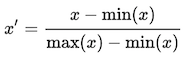

In [ ]:
df_melb

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [ ]:
df_scalling

,Price,Distance,Postcode,Bedroom2,Car,Landsize,BuildingArea,Propertycount
0,1480000.0,2.5,3067.0,2.0,1.0,202.0,NaN,4019.0
1,1035000.0,2.5,3067.0,2.0,0.0,156.0,79.0,4019.0
2,1465000.0,2.5,3067.0,3.0,0.0,134.0,150.0,4019.0
3,850000.0,2.5,3067.0,3.0,1.0,94.0,NaN,4019.0
4,1600000.0,2.5,3067.0,3.0,2.0,120.0,142.0,4019.0
...,...,...,...,...,...,...,...,...
13575,1245000.0,16.7,3150.0,4.0,2.0,652.0,NaN,7392.0
13576,1031000.0,6.8,3016.0,3.0,2.0,333.0,133.0,6380.0
13577,1170000.0,6.8,3016.0,3.0,4.0,436.0,NaN,6380.0
13578,2500000.0,6.8,3016.0,4.0,5.0,866.0,157.0,6380.0


In [ ]:
# Using MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [ ]:
df_normalization = min_max.fit_transform(df_scalling)

In [ ]:
df_normalization

array([[0.15647785, 0.05197505, 0.06857728, ..., 0.0004665 ,        nan,
        0.17615999],
       [0.10656197, 0.05197505, 0.06857728, ..., 0.00036027, 0.00177468,
        0.17615999],
       [0.15479529, 0.05197505, 0.06857728, ..., 0.00030946, 0.00336965,
        0.17615999],
       ...,
       [0.12170499, 0.14137214, 0.01637666, ..., 0.0010069 ,        nan,
        0.28648194],
       [0.27089176, 0.14137214, 0.01637666, ..., 0.00199994, 0.0035269 ,
        0.28648194],
       [0.1346046 , 0.13097713, 0.01330604, ..., 0.000836  , 0.00251601,
        0.29409841]])